In [3]:
import os
import random
import shutil
import xml.etree.ElementTree as ET

# Define dataset paths
image_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_png"
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"
output_dir = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/split_data"

# Get all report files (base names without .xml)
xml_files = sorted([f for f in os.listdir(xml_folder) if f.endswith('.xml')])

# Shuffle dataset for randomness
random.seed(42)  # Ensures reproducibility
random.shuffle(xml_files)

# Define split ratios
train_ratio, val_ratio, test_ratio = 0.8, 0.1, 0.1

# Compute split sizes
total_reports = len(xml_files)
train_size = int(train_ratio * total_reports)
val_size = int(val_ratio * total_reports)

# Split the dataset
train_files = xml_files[:train_size]
val_files = xml_files[train_size:train_size + val_size]
test_files = xml_files[train_size + val_size:]

# Function to move files into split folders
def move_files(files, split_name):
    os.makedirs(f"{output_dir}/{split_name}/images", exist_ok=True)
    os.makedirs(f"{output_dir}/{split_name}/reports", exist_ok=True)
    
    for xml_file in files:
        xml_path = os.path.join(xml_folder, xml_file)
        
        # Parse XML to get image ID
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # Find all image IDs in the XML file
        image_ids = [img.get("id") for img in root.findall(".//parentImage")]
        
        # Move report
        shutil.copy(xml_path, f"{output_dir}/{split_name}/reports/{xml_file}")
        
        # Move corresponding images
        for image_id in image_ids:
            image_filename = image_id + ".png"  # Assuming images are in .png format
            image_path = os.path.join(image_folder, image_filename)
            
            if os.path.exists(image_path):
                shutil.copy(image_path, f"{output_dir}/{split_name}/images/{image_filename}")
            else:
                print(f"⚠️ Image not found: {image_filename} (for report: {xml_file})")

# Apply function to train, val, and test sets
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print(f"✅ Dataset split complete!")
print(f"Train: {len(train_files)} reports")
print(f"Validation: {len(val_files)} reports")
print(f"Test: {len(test_files)} reports")

✅ Dataset split complete!
Train: 3141 reports
Validation: 392 reports
Test: 394 reports


In [4]:
import os

# Define split directories
splits = ["train", "val", "test"]
output_dir = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/split_data"

# Check counts for each split
for split in splits:
    num_reports = len(os.listdir(f"{output_dir}/{split}/reports"))
    num_images = len(os.listdir(f"{output_dir}/{split}/images"))
    
    print(f"📂 {split.upper()} SET:")
    print(f"   📄 Reports: {num_reports}")
    print(f"   🖼️ Images: {num_images}")
    print("-" * 30)


📂 TRAIN SET:
   📄 Reports: 3141
   🖼️ Images: 5933
------------------------------
📂 VAL SET:
   📄 Reports: 392
   🖼️ Images: 754
------------------------------
📂 TEST SET:
   📄 Reports: 394
   🖼️ Images: 743
------------------------------


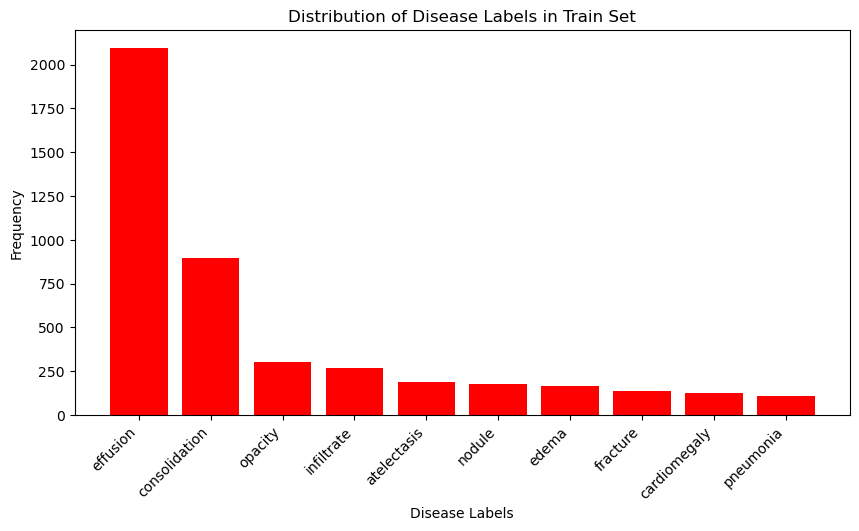

In [5]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from collections import Counter

# Define the train reports directory
train_reports_dir = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/split_data/train/reports"

# List of disease labels to track (adjust based on dataset)
disease_keywords = ["effusion", "edema", "consolidation", "opacity", "atelectasis",
                    "pneumonia", "infiltrate", "cardiomegaly", "nodule", "fracture"]

# Count occurrences of each disease
disease_counts = Counter()

# Process each report in the train set
for xml_file in os.listdir(train_reports_dir):
    xml_path = os.path.join(train_reports_dir, xml_file)
    
    # Parse XML
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Extract findings section
    findings_text = ""
    for elem in root.findall(".//AbstractText"):
        label = elem.get("Label", "").lower()
        if "findings" in label:
            findings_text = elem.text.lower() if elem.text else ""

    # Count disease mentions
    for disease in disease_keywords:
        if disease in findings_text:
            disease_counts[disease] += 1

# Sort by frequency
disease_counts = dict(sorted(disease_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the disease distribution
plt.figure(figsize=(10, 5))
plt.bar(disease_counts.keys(), disease_counts.values(), color='red')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Disease Labels")
plt.ylabel("Frequency")
plt.title("Distribution of Disease Labels in Train Set")
plt.show()
